I've been hearing about the [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) for years and its never quite made sense to me, so I decided to program up a quick simulation. 

In the Monty Hall problem, there is a car behind one of three doors. There are goats behind the other two doors. The contestant picks one of the three doors. Monty Hall (the game show host) then reveals that one of the two unchosen doors has a goat behind it. The question is whether the constestant should change the door they picked or keep their choice. 

My first intuition was that it doesn't matter whether the contestant changes their choice because its equally probable that the car is behind either of the two unopened doors, but I've been told this is incorrect! Instead, the contestant is more likely to win the car if they change their choice. 

How can this be? Well, I decided to create a simple simulation of the Monty Hall problem in order to prove to myself that there really is an advantage to changing the chosen door and (hopefully) gain an intuition into how this works. 

Below I've written my little simulation. A jupyter notebook with this code is available on my [github](https://github.com/dvatterott/jupyter_notebooks). 

In [1]:
import random
import copy
import numpy as np

start_vect = [1,0,0] #doors

samples = 5000 #number of simulations to run

change, no_change = [],[]
for i in range(samples):
    
    #shuffle data
    vect = copy.copy(start_vect)
    random.shuffle(vect)

    #make choice
    choice = vect.pop(random.randint(0,2))
    no_change.append(choice) #outcome if do not change choice

    #show bad door
    try:
        bad = vect.pop(int(np.where(np.array(vect)==0)[0]))
    except:
        bad = vect.pop(0)

    change.append(vect) #outcome if change choice

Here I plot the results

Probability of choosing correctly if change choice: 0.67
Probability of choosing correctly if do not change choice: 0.33
Probability of difference arising from chance: 0.00000


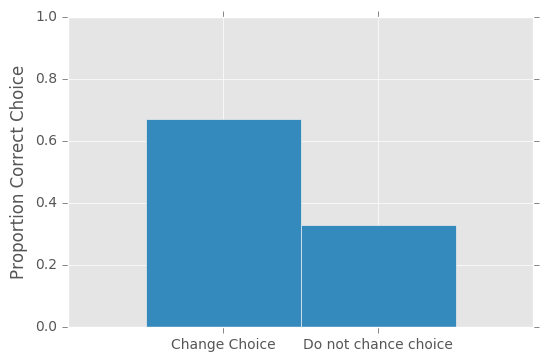

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.bar([0.5,1.5],[np.mean(change),np.mean(no_change)],width=1.0)
plt.xlim((0,3))
plt.ylim((0,1))
plt.ylabel('Proportion Correct Choice')
plt.xticks((1.0,2.0),['Change Choice', 'Do not chance choice'])

import scipy.stats as stats
obs = np.array([[np.sum(change), np.sum(no_change)], [samples, samples]])
print('Probability of choosing correctly if change choice: %0.2f' % np.mean(change))
print('Probability of choosing correctly if do not change choice: %0.2f' % np.mean(no_change))
print('Probability of difference arising from chance: %0.5f' % stats.chi2_contingency(obs)[1])

Clearly, the contestant should change their choice! 

So now, just to make sure I am not crazy, I decided to simulate the Monty Hall problem with the contestant choosing what door to open after Monty Hall opens a door with a goat. 

In [25]:
change, no_change = [],[]
for i in range(samples):
    #shuffle data
    vect = copy.copy(start_vect)
    random.shuffle(vect)

    #show bad door
    bad = vect.pop(int(np.where(np.array(vect)==0)[0][0]))

    #make choice
    choice = vect.pop(random.randint(0,1))
    no_change.append(choice)

    change.append(vect)


Probability of choosing correctly if change choice: 0.51
Probability of choosing correctly if do not change choice: 0.49
Probability of difference arising from chance: 0.57546


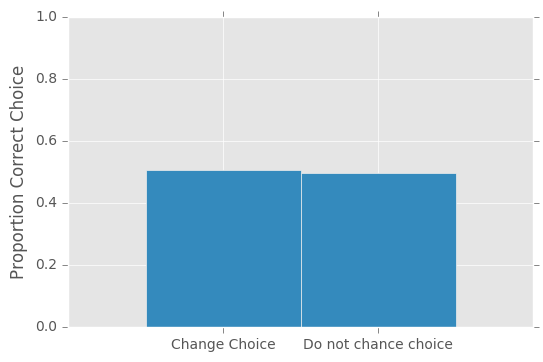

In [26]:
plt.bar([0.5,1.5],[np.mean(change),np.mean(no_change)],width=1.0)
plt.xlim((0,3))
plt.ylim((0,1))
plt.ylabel('Proportion Correct Choice')
plt.xticks((1.0,2.0),['Change Choice', 'Do not chance choice'])

obs = np.array([[np.sum(change), np.sum(no_change)], [samples, samples]])
print('Probability of choosing correctly if change choice: %0.2f' % np.mean(change))
print('Probability of choosing correctly if do not change choice: %0.2f' % np.mean(no_change))
print('Probability of difference arising from chance: %0.5f' % stats.chi2_contingency(obs)[1])

Now, there is clearly no difference between whether the contestant changes their choice or not. 

So what is different about these two scenarios? 

In the first scenario, the contestant makes a choice before Monty Hall reveals which of the two unchosen options is incorrect. Here's the intution I've gained by doing this - because Monty Hall cannot reveal what is behind the chosen door, when Monty Hall reveals what is behind one of the unchosen doors, this has no impact on how likely the car is to appear behind the chosen door. Yet, the probability that the car is behind the revealed door drops to 0 (because Monty Hall shows there's a goat behind it), and the total probability must be conserved so the second unchosen door receives any belief that the car was behind the revealed door! Thus, the unchosen and unrevealed door becomes 66% likely to contain the car! I am still not 100% convinced of this new intuition, but it seems correct given these simulations! 